# Utilizando o KNN para identificar dígitos escritos a mão 

# Carregando base de dados - Dígitos

In [1]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

#the digits dataset
digits = datasets.load_digits()

# Descrição da base de dados

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Visualizando os valores de dados

In [3]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

# Visualizando os valores da classe

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Visualizando as imagens e Classes

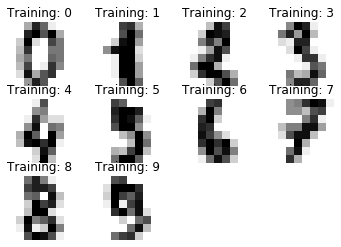

In [6]:
images_and_labels = list(zip(digits.images,digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' %label)

# Convertendo os dados em Dataframes

In [8]:
import pandas as pd
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

dataset = pd.DataFrame(data)
dataset['classe'] = classe

dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# Dividindo os dados em treino e teste

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('classe', axis=1), dataset['classe'], test_size=0.3)

# Verificando a forma dos dados

In [10]:
x_train.shape, x_test.shape

((1257, 64), (540, 64))

In [11]:
y_train.shape, y_test.shape

((1257,), (540,))

# Instanciando o algoritmo KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Treinando o algoritmo

In [14]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Predizendo novos pontos

In [15]:
resultado = knn.predict(x_test)

# Técnicas de Validação

### Métricas de classificação

In [16]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.93      1.00      0.96        54
           2       1.00      1.00      1.00        51
           3       0.98      0.98      0.98        66
           4       1.00      0.98      0.99        51
           5       1.00      1.00      1.00        53
           6       1.00      1.00      1.00        57
           7       1.00      0.98      0.99        45
           8       1.00      0.95      0.97        56
           9       0.96      0.98      0.97        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



# Matriz de confusão

In [17]:
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['         Predito'], margins=True))

         Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                         
0                 56   0   0   0   0   0   0   0   0   0   56
1                  0  54   0   0   0   0   0   0   0   0   54
2                  0   0  51   0   0   0   0   0   0   0   51
3                  0   0   0  65   0   0   0   0   0   1   66
4                  0   1   0   0  50   0   0   0   0   0   51
5                  0   0   0   0   0  53   0   0   0   0   53
6                  0   0   0   0   0   0  57   0   0   0   57
7                  0   0   0   0   0   0   0  44   0   1   45
8                  0   3   0   0   0   0   0   0  53   0   56
9                  0   0   0   1   0   0   0   0   0  50   51
All               56  58  51  66  50  53  57  44  53  52  540


# Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, dataset.drop('classe', axis=1), dataset['classe'], cv=5)
score

array([0.95604396, 0.95856354, 0.96657382, 0.98319328, 0.96619718])